# Exploratory Data Analysis of US election

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [32]:
#import excel file as a dataframe
data= pd.read_excel('improvised_data_train.xlsx')
data.head(4)

,Gender,Age,Income,Region,PartyID,Ideology,Vote Intention,Attention to election
0,Male,45-65,Under $50K,West,Democratic,Liberal,Trump,A lot
1,Male,65+,$50-100K,West,Independent,Modern Liberal,Trump,A lot
2,Male,30-44,Under $50K,Midwest,Democratic,Conservative,Trump,A lot
3,Male,30-44,Under $50K,Northeast,Democratic,Liberal,Biden,A lot


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1199 non-null   object
 1   Age                    1199 non-null   object
 2   Income                 1199 non-null   object
 3   Region                 1199 non-null   object
 4   PartyID                1199 non-null   object
 5   Ideology               1199 non-null   object
 6   Vote Intention         1199 non-null   object
 7   Attention to election  1199 non-null   object
dtypes: object(8)
memory usage: 75.1+ KB


In [34]:
data.describe()

,Gender,Age,Income,Region,PartyID,Ideology,Vote Intention,Attention to election
count,1199,1199,1199,1199,1199,1199,1199,1199
unique,2,4,3,4,3,3,3,3
top,Male,45-65,Under $50K,South,Democratic,Conservative,Biden,A lot
freq,683,506,510,469,434,444,611,1018


In [35]:
data.isnull().sum()

Gender                   0
Age                      0
Income                   0
Region                   0
PartyID                  0
Ideology                 0
Vote Intention           0
Attention to election    0
dtype: int64

In [36]:
data.columns

Index(['Gender', 'Age', 'Income', 'Region', 'PartyID', 'Ideology',
       'Vote Intention', 'Attention to election'],
      dtype='object')

In [37]:
data.Gender.value_counts()

Male      683
Female    516
Name: Gender, dtype: int64

In [38]:
data.Age.value_counts()

45-65    506
65+      312
30-44    242
18-29    139
Name: Age, dtype: int64

In [39]:
data.Income.value_counts()

Under $50K       510
$50-100K         414
$100K or more    275
Name: Income, dtype: int64

In [41]:
data.PartyID.value_counts()

Democratic     434
Independent    431
Republican     334
Name: PartyID, dtype: int64

In [42]:
data.Ideology.value_counts()

Conservative      444
Liberal           383
Modern Liberal    372
Name: Ideology, dtype: int64

In [43]:
data['Vote Intention'].value_counts()

Biden    611
Trump    514
Other     74
Name: Vote Intention, dtype: int64

In [44]:
data['Attention to election'].value_counts()

A lot            1018
Some              119
Only a little      62
Name: Attention to election, dtype: int64

# Relationship between gender and voting intention


Gender  Vote Intention
Female  Biden             265
        Trump             220
        Other              31
Male    Biden             346
        Trump             294
        Other              43
Name: Vote Intention, dtype: int64


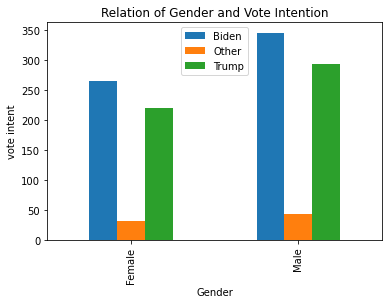

In [45]:
Gender_vote_intent = data.groupby('Gender')['Vote Intention'].value_counts()
print(Gender_vote_intent)
Gender_vote_intent.unstack().plot(kind='bar',legend =True,ylabel='vote intent',title='Relation of Gender and Vote Intention')
plt.legend(loc='upper center')

# Relationship Of Age and Gender to Attention to Election

Age    Gender
18-29  Female     67
       Male       72
30-44  Female    107
       Male      135
45-65  Female    211
       Male      295
65+    Female    131
       Male      181
Name: Attention to election, dtype: int64


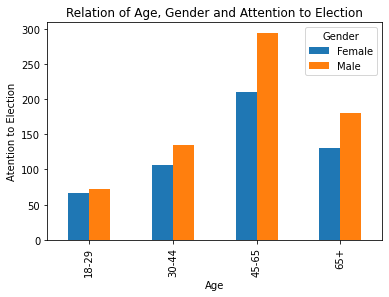

In [46]:
Gender_vote_age = data.groupby(['Age','Gender'])['Attention to election'].count()
print(Gender_vote_age)
Gender_vote_age.unstack().plot(kind='bar',legend =True,ylabel='Atention to Election',title='Relation of Age, Gender and Attention to Election')
plt.show()

## Preprocessing of data to be trained

In [47]:
data['Vote Intention'] = data['Vote Intention'].map({'Trump': 1,'Biden': 2, 'Other': 3})
data['Age'] = data['Age'].map({'18-29': 1,'30-44': 2,'45-65': 3, '65+': 4})
data['Income'] = data['Income'].map({'Under $50K': 1,'$50-100K': 2, '$100K or more': 3})
data['Gender'] = data['Gender'].map({'Male': 1,'Female': 2})
data['Ideology'] = data['Ideology'].map({'Conservative': 1,'Liberal':2,'Modern Liberal': 3})


In [48]:
# K nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
X=data['Vote Intention']
y= data.drop('Vote Intention', axis=1)

knn=KNeighborsClassifier(n_neighbors=3)
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=2,test_size=0.3)

In [50]:
X

0       1
1       1
2       1
3       2
4       1
       ..
1194    1
1195    2
1196    1
1197    2
1198    2
Name: Vote Intention, Length: 1199, dtype: int64